
**GROUP PROJECT**<p>
**GROUP MEMBERS:**<p>
>**CASSANDRA**<p>
>**SHAIDAH**<p>
>**DONGDAO**


#**Supervised Learning**

Supervised learning is the machine learning method which takes labelled data as the input to train itself. Generally, supervised learning models are trained to predict outcomes or classify data accurately.

##**Importing libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("Data2.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##**Pre-Analytics of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


The email spam data set consists of 5572 data, with 2 categories for the messages, namely the 'spam' or 'ham' data. In order to perform analysis on the text data, the text data will be processed in the following steps.

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace = True)
df.shape

(5157, 2)

In [ ]:
# Check missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#Tokenization
def process_msg(msg):
  
  # Removing punctuations
  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  # Lowering case
  nopunc = nopunc.lower()

  # Removing stopwords
  clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return clean_msg

In [ ]:
df = df.replace(['ham','spam'],[0, 1])
df.head(10)

,Category,Message
0,0,[go until jurong point crazy available only in...
1,0,[ok lar joking wif u oni]
2,1,[free entry in 2 a wkly comp to win fa cup fin...
3,0,[u dun say so early hor u c already then say]
4,0,[nah i dont think he goes to usf he lives arou...
5,1,[freemsg hey there darling its been 3 weeks no...
6,0,[even my brother is not like to speak with me ...
7,0,[as per your request melle melle oru minnaminu...
8,1,[winner as a valued network customer you have ...
9,1,[had your mobile 11 months or more u r entitle...


Ham data is labelled by 0 and spam data is labelled by 1.

##**Exploring Data**

In [ ]:
df.groupby('Category').size()

Category
0    4516
1     641
dtype: int64

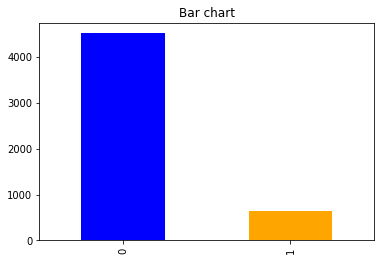

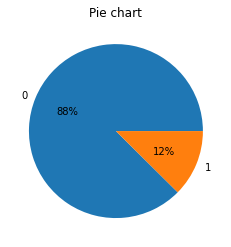

In [ ]:
# use the bar chart to show how many normal mail and how many spam mail
count_Class=pd.value_counts(df["Category"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

# use the pie chart to show the ratio
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
# percentage of data that needs to be balanced
print(str(round(df[df['Category']==1].count()[0]/df[df['Category']==0].count()[0],2))+'%')

0.14%


In [ ]:
# creating 2 new dataframe 

df_spam = df[df['Category']==1]

df_ham = df[df['Category']==0]

print("Ham Dataset Shape:", df_ham.shape)

print("Spam Dataset Shape:", df_spam.shape)

Ham Dataset Shape: (4516, 2)
Spam Dataset Shape: (641, 2)


In [ ]:
# downsampling ham dataset 
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(641, 2)

In [ ]:
# concating both dataset to create balanced dataset
df_balanced = pd.concat([df_spam , df_ham_downsampled])
df_balanced['Category'].value_counts()

1    641
0    641
Name: Category, dtype: int64

In [ ]:
# print sample of balanced dataset
df_balanced.sample(10)

,Category,Message
5468,1,[urgent last weekends draw shows that you have...
335,1,[valentines day special win over £1000 in our ...
4376,1,[ur tonexs subscription has been renewed and y...
4821,1,[check out choose your babe videos smsshsexne...
1793,1,[win we have a winner mr t foley won an ipod m...
2754,0,[derp which is worse a dude who always wants t...
3111,1,[good luck draw takes place 28th feb 06 good l...
3082,0,[have a great trip to india and bring the ligh...
474,1,[want 2 get laid tonight want real dogging loc...
1279,0,[can i meet ü at 5 as 4 where depends on where...


The balanced data set will be used to proceed with the implementation in the supervised learning model.

##**Feature Selection**

Since the email spam data only consists of two variables, which are the predictor variable (Message) and target variable (Category) respectively, therefore there is no further action required on feature selection.

##**Implementation of Supervised Learning Model**

###**Naive Bayes Classfication Model**

In [ ]:
df_balanced['Message'].head().apply(process_msg)

2     [free, entry, 2, wkly, comp, win, fa, cup, fin...
5     [freemsg, hey, darling, 3, weeks, word, back, ...
8     [winner, valued, network, customer, selected, ...
9     [mobile, 11, months, u, r, entitled, update, l...
11    [six, chances, win, cash, 100, 20000, pounds, ...
Name: Message, dtype: object

During the pre-processing of the sentences, the sentences were broken into words, which can then proceed with the step of vectorisation. The purpose of vectorisation, which means converting text data into numerical data, is to count the distinct words and the corresponding frequency of each distinct word in the mails. Vectorization is required since the machine does not understand words. Therefore, the words need to be represented by numbers.

In [ ]:
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer

messages_bow = CountVectorizer(analyzer = process_msg).fit_transform(df_balanced['Message'])

In [ ]:
# Split data into 80% training and 20% testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(messages_bow,df_balanced['Category'], test_size = 0.2, random_state=0)

Naïve Bayes is one of the most widely-used supervised learning methods for classification. Their classifier is naive because it assumes that the connected contingencies are independent of one another. The computation of overall document feasibility would be the substance of merging all of the single word feasibility reports in the file. These Naïve Bayesian classifiers have been widely employed in sentiment categorization since they have less computational power than other algorithms, yet independence assumptions will lead to inaccurate results .

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifierNB = MultinomialNB()
classifierNB.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Naive Bayes Model assessment for train data set
print('Naive Bayes Model Assessment\nTrain data set:\n')

# Predictions
print('Predictions:\t', classifierNB.predict(x_train))

# Actual values
print('Actual values:\t', y_train.values)
print()

# Model assessment results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediction = classifierNB.predict(x_train)
print(classification_report(y_train, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_train, prediction))
print('\nAccuracy:', accuracy_score(y_train, prediction)*100, '%')

Naive Bayes Model Assessment
Train data set:

Predictions:	 [1 1 1 ... 0 1 0]
Actual values:	 [1 1 1 ... 0 1 0]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       513
           1       0.99      0.98      0.99       512

    accuracy                           0.99      1025
   macro avg       0.99      0.99      0.99      1025
weighted avg       0.99      0.99      0.99      1025

Confusion Matrix:
 [[509   4]
 [  9 503]]

Accuracy: 98.73170731707317 %


In [ ]:
# Model assessment for test data set
print('Naive Bayes Model Assessment\nTest data set:\n')

# Predictions
print('Predictions:\t', classifierNB.predict(x_test))

# Actual values
print('Actual values:\t', y_test.values)
print()

# Model assessment results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediction = classifierNB.predict(x_test)
print(classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))
print('\nAccuracy:', accuracy_score(y_test, prediction)*100, '%')

Naive Bayes Model Assessment
Test data set:

Predictions:	 [0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0]
Actual values:	 [0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 1 1 1 1

The Naïve Bayes Classifier achieved an accuracy score of approximately 98.73% on the train data and 92.61% on the test data, which is satisfying. 

#**Unsupervised Learning**

##**Importing libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [ ]:
#read the data
df = pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(525461, 8)

## **Pre-Analytics of Data**

In [ ]:
#check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Based on the non-null count, we found that 'Description' and 'Cutomer ID' has less data than others. Hence, we need to check which column and the total of the missing values.

In [ ]:
# check missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

It's proven that Description and Customer ID have missing values where most of the missing values dominated by Customer ID.

In [ ]:
# remove missing values
df_new = df.dropna()

In [ ]:
# check missing values for df_new
df_new.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [ ]:
df_new.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


By using the df.describe() function we know the basic information of the dataset where the minimum quantity is in negative value and it should not be in negative. So, we have to remove this redundancy in order to get better accuracy because redundancy can cause miss grouping of data.

In [ ]:
# remove negative values in Quantity
df_new = df_new[df_new.Quantity > 0]
df_new.describe()

,Quantity,Price,Customer ID
count,377573.000000,377573.000000,377573.000000
mean,13.860175,3.279939,15359.270305
std,95.197029,36.107696,1683.440033
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,6.000000,1.950000,15311.000000
75%,12.000000,3.750000,16802.000000
max,19152.000000,10953.500000,18287.000000


###**Removal of Outliers**

To remove the outliers in the data, Tukey's box plot method is applied.
<p>Tukey's box plot outlines the inner fence and outer fence, as defined in the following:<p>
$inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]$<p>
$outer fence = [Q1-3*IQR, Q3+3*IQR]$<p>
In this study, we remove the possible outliers, which are the outliers lying beyond the outer fence.


In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
        
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    return outer_fence_le, outer_fence_ue    

In [ ]:
# Removal of outliers from Quantity variable in df_new
df_new = df_new[df_new['Quantity']>=tukeys_method(df_new,'Quantity')[0]]
df_new = df_new[df_new['Quantity']<=tukeys_method(df_new,'Quantity')[1]]  
df_new.describe()

,Quantity,Price,Customer ID
count,350852.000000,350852.000000,350852.000000
mean,7.768452,2.690782,15374.227082
std,7.745254,2.262591,1681.260008
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13999.000000
50%,6.000000,1.950000,15346.000000
75%,12.000000,3.450000,16817.000000
max,42.000000,10.950000,18287.000000


In [ ]:
# Removal of outliers from Price variable in df_new
df_new = df_new[df_new['Price']>=tukeys_method(df_new,'Price')[0]]
df_new = df_new[df_new['Price']<=tukeys_method(df_new,'Price')[1]]  
df_new.describe()

,Quantity,Price,Customer ID
count,348784.000000,348784.000000,348784.000000
mean,7.783227,2.642381,15375.803612
std,7.749867,2.179938,1681.585011
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14000.000000
50%,6.000000,1.950000,15351.000000
75%,12.000000,3.350000,16823.000000
max,42.000000,10.000000,18287.000000


Lastly, we check again dataset information to ensure no missing values and outliers data.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348784 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      348784 non-null  object        
 1   StockCode    348784 non-null  object        
 2   Description  348784 non-null  object        
 3   Quantity     348784 non-null  int64         
 4   InvoiceDate  348784 non-null  datetime64[ns]
 5   Price        348784 non-null  float64       
 6   Customer ID  348784 non-null  float64       
 7   Country      348784 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.9+ MB


In [ ]:
# new copy data for EDA 
df_eda = df_new

we make df_new another copy for EDA since calculation part might impact changes in datatype. The new copy dataset is refer as df_eda to represent dataset used for analysis. 


### **Data Aggregation**

In [ ]:
# calculate Total Amount for each product
# calculate monetary value
df_new['Total Amount'] = df_new['Quantity'] * df_new['Price']
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6


In [ ]:
# grouping monetary value
cust_details = df_new.groupby('Customer ID')['Total Amount'].sum()
cust_details = cust_details.reset_index()
cust_details

,Customer ID,Total Amount
0,12346.0,372.86
1,12347.0,1270.22
2,12348.0,222.16
3,12349.0,1746.24
4,12351.0,258.48
...,...,...
4179,18283.0,572.97
4180,18284.0,329.72
4181,18285.0,143.10
4182,18286.0,1062.68


In [ ]:
#calculate frequency
cust_details2 = df_new.groupby('Customer ID')['Invoice'].count()
cust_details2 = cust_details2.reset_index()
cust_details2.columns = ['Customer ID', 'Frequency']
cust_details2

,Customer ID,Frequency
0,12346.0,33
1,12347.0,69
2,12348.0,20
3,12349.0,87
4,12351.0,18
...,...,...
4179,18283.0,219
4180,18284.0,24
4181,18285.0,9
4182,18286.0,59


In [ ]:
# calculate recency
max_date=max(df_new['InvoiceDate'])
max_date

Timestamp('2010-12-09 20:01:00')

In [ ]:
df_new['Recency']=max_date-df_new['InvoiceDate']
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,373 days 12:16:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,373 days 12:16:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,373 days 12:16:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,373 days 12:16:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,373 days 12:16:00


In [ ]:
# Compute last transaction date to get the recency of customers

cust_details3 = df_new.groupby('Customer ID')['Recency'].min()
cust_details3 = cust_details3.reset_index()
cust_details3.head()

,Customer ID,Recency
0,12346.0,164 days 06:08:00
1,12347.0,2 days 05:04:00
2,12348.0,73 days 05:02:00
3,12349.0,42 days 11:38:00
4,12351.0,10 days 04:38:00


In [ ]:
#Recency Metric
import datetime as dt
today_date = dt.datetime(2011,12,9)
df_new["Customer ID"] = df_new["Customer ID"].astype(int)
temp_df = (today_date - df_new.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
recency_df = temp_df["Recency"].apply(lambda x: x.days)

# Frequency Metric
temp_df = df_new.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)

# Monetary Metric
monetary_df = df_new.groupby("Customer ID").agg({"Total Amount":"sum"})
monetary_df.rename(columns = {"Total Amount": "Monetary"}, inplace = True)
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
df_new = rfm
df_new["RecencyScore"] = pd.qcut(df_new['Recency'], 5, labels = [5, 4, 3, 2, 1])
df_new["FrequencyScore"] = pd.qcut(df_new['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
df_new["MonetaryScore"] = pd.qcut(df_new['Monetary'], 5, labels = [1,2,3,4,5])
df_new["RFM_SCORE"] = df_new['RecencyScore'].astype(str) + df_new['FrequencyScore'].astype(str) + df_new['MonetaryScore'].astype(str)
seg_map = {
        r'[1-2][1-2]': 'Hibernating',
        r'[1-2][3-4]': 'At Risk',
        r'[1-2]5': 'Can\'t Loose',
        r'3[1-2]': 'About to Sleep',
        r'33': 'Need Attention',
        r'[3-4][4-5]': 'Loyal Customers',
        r'41': 'Promising',
        r'51': 'New Customers',
        r'[4-5][2-3]': 'Potential Loyalists',
        r'5[4-5]': 'Champions'
}

df_new['Segment'] = df_new['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
df_new['Segment'] = df_new['Segment'].replace(seg_map, regex=True)
df_new.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,528,11,372.86,2,5,2,252,Can't Loose
12347,366,2,1270.22,5,2,4,524,Potential Loyalists
12348,437,1,222.16,2,1,2,212,Hibernating
12349,406,2,1746.24,3,2,5,325,About to Sleep
12351,374,1,258.48,5,1,2,512,New Customers


In [ ]:
rfm = df_new.loc[:,"Recency":"Monetary"]
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,528,11,372.86
12347,366,2,1270.22
12348,437,1,222.16
12349,406,2,1746.24
12351,374,1,258.48


## **Exploring Data**

In [ ]:
# change invoice date format
df_eda['InvoiceDate'] = pd.to_datetime(df_eda.InvoiceDate,format = '%d/%m/%Y %H:%M')
df_eda.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,373 days 12:16:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,373 days 12:16:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,373 days 12:16:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,373 days 12:16:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6,373 days 12:16:00


In [ ]:
df_eda.insert(loc = 4, column = 'year_month',value = df_eda.InvoiceDate.map(lambda x: 100 * x.year + x.month))
df_eda.insert(loc = 5, column = 'year',value = df_eda.InvoiceDate.dt.year)
df_eda.insert(loc = 6, column = 'month',value = df_eda.InvoiceDate.dt.month)
df_eda.insert(loc = 7, column = 'day',value = df_eda.InvoiceDate.dt.day)
df_eda.insert(loc = 8, column = 'hour',value = df_eda.InvoiceDate.dt.hour)
df_eda.insert(loc = 9, column='day_of_week',value = (df_eda.InvoiceDate.dt.dayofweek)+1)
df_eda.head()

,Invoice,StockCode,Description,Quantity,year_month,year,month,day,hour,day_of_week,InvoiceDate,Price,Customer ID,Country,Total Amount,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,373 days 12:16:00
1,489434,79323P,PINK CHERRY LIGHTS,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,373 days 12:16:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,373 days 12:16:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,373 days 12:16:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6,373 days 12:16:00


In [ ]:
# orders based on each day
ord_dayofweek = df_eda.groupby('Invoice')['day_of_week'].unique().value_counts().sort_index()

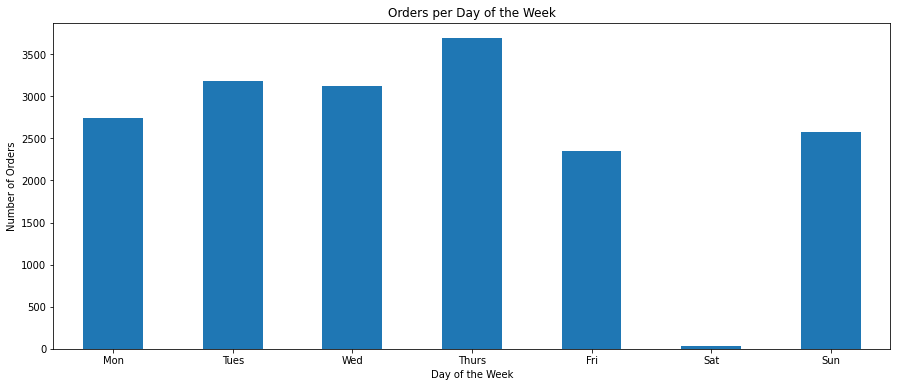

In [ ]:
odw = ord_dayofweek.plot(kind='bar', figsize = (15, 6))
odw.set_xlabel('Day of the Week')
odw.set_ylabel('Number of Orders')
odw.set_title('Orders per Day of the Week')
odw.set_xticklabels(labels = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'],rotation='horizontal')
plt.show()

As shown in the figure, Thursday is the most popular day for customers to shop online. Since people have more leisure time over the weekend, ecommerce is quietest during the weekend and sales begin to drop on Friday and Saturday is the lowest day for sales because people are more leisurely. Since Monday is often considered as the busiest day of the week, sales usually drop on that day as well. 

In [ ]:
# orders based on months
ord_month = df_eda.groupby(['Invoice'])['year_month'].unique().value_counts().sort_index()

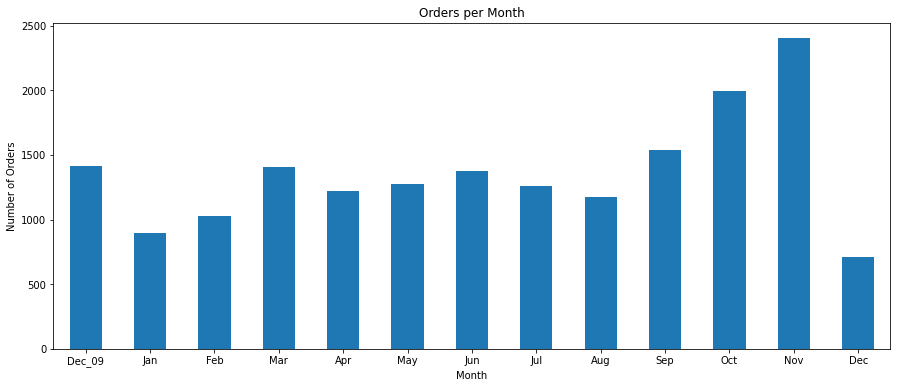

In [ ]:
om = ord_month.plot(kind='bar', figsize = (15, 6))
om.set_xlabel('Month')
om.set_ylabel('Number of Orders')
om.set_title('Orders per Month')
om.set_xticklabels(('Dec_09', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation = 'horizontal')
plt.show()

As shown in the figure, November has the highest number of orders compared to other months. This is probably due to the holidays and up coming festival such as Christmas. 

In [ ]:
# check november orders 
df_Nov = df_eda[df_eda['month']==11]
df_Nov.head()

,Invoice,StockCode,Description,Quantity,year_month,year,month,day,hour,day_of_week,InvoiceDate,Price,Customer ID,Country,Total Amount,Recency
424923,529995,48184,DOORMAT ENGLISH ROSE,6,201011,2010,11,1,8,1,2010-11-01 08:56:00,7.95,16316,United Kingdom,47.7,38 days 11:05:00
424924,529995,48187,DOORMAT NEW ENGLAND,4,201011,2010,11,1,8,1,2010-11-01 08:56:00,7.95,16316,United Kingdom,31.8,38 days 11:05:00
424925,529995,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,201011,2010,11,1,8,1,2010-11-01 08:56:00,6.75,16316,United Kingdom,67.5,38 days 11:05:00
424926,529995,22708,WRAP DOLLY GIRL,25,201011,2010,11,1,8,1,2010-11-01 08:56:00,0.42,16316,United Kingdom,10.5,38 days 11:05:00
424927,529995,22781,GUMBALL MAGAZINE RACK,4,201011,2010,11,1,8,1,2010-11-01 08:56:00,7.65,16316,United Kingdom,30.6,38 days 11:05:00


In [ ]:
# top orders bought in November 
df_Nov.sort_values(by = 'Quantity', ascending = False).head()

,Invoice,StockCode,Description,Quantity,year_month,year,month,day,hour,day_of_week,InvoiceDate,Price,Customer ID,Country,Total Amount,Recency
467470,533472,10002,INFLATABLE POLITICAL GLOBE,42,201011,2010,11,17,12,3,2010-11-17 12:44:00,0.85,12847,United Kingdom,35.70,22 days 07:17:00
497444,535902,22207,FRYING PAN UNION FLAG,42,201011,2010,11,29,11,1,2010-11-29 11:24:00,3.75,17389,United Kingdom,157.50,10 days 08:37:00
437058,531202,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,42,201011,2010,11,5,15,5,2010-11-05 15:21:00,1.69,17389,United Kingdom,70.98,34 days 04:40:00
437071,531204,84970S,HANGING HEART ZINC T-LIGHT HOLDER,42,201011,2010,11,5,15,5,2010-11-05 15:25:00,0.85,17389,United Kingdom,35.70,34 days 04:36:00
439337,531362,22355,CHARLOTTE BAG SUKI DESIGN,42,201011,2010,11,7,14,7,2010-11-07 14:28:00,0.85,13561,United Kingdom,35.70,32 days 05:33:00


As we can see, the top products bought by the customer is light. This is probably for Christmas Eve preparation. 

In [ ]:
# grouping customer order
ord_cust = df_eda.groupby(by=['Customer ID','Country'],as_index = False)['Invoice'].count()
ord_cust.head()

,Customer ID,Country,Invoice
0,12346,United Kingdom,33
1,12347,Iceland,69
2,12348,Finland,20
3,12349,Italy,87
4,12351,Unspecified,18


In [ ]:
# customer purchase info
ord_cust.describe()

,Customer ID,Invoice
count,4188.000000,4188.000000
mean,15351.632044,83.281757
std,1700.479788,177.429407
min,12346.000000,1.000000
25%,13883.750000,16.000000
50%,15354.500000,39.000000
75%,16836.500000,91.250000
max,18287.000000,4714.000000


Based on the invoice, there are 75% of the customer place order more than 100 products. Hence, we can find which customer has highest number of purchase 

In [ ]:
# Top 10 customer with most purchase
print('TOP 10 Customers with most Purchase')
ord_cust.sort_values(by = 'Invoice', ascending = False).rename({"Invoice":"Frequency"},axis=1).head(10)

TOP 10 Customers with most Purchase


,Customer ID,Country,Frequency
1782,14911,EIRE,4714
3877,17841,United Kingdom,4609
1555,14606,United Kingdom,3582
3884,17850,United Kingdom,2474
245,12748,United Kingdom,2367
2945,16549,United Kingdom,2078
1229,14156,EIRE,1888
2068,15311,United Kingdom,1660
3104,16782,United Kingdom,1574
1496,14527,United Kingdom,1470


As you can see, these are the top 10 customer with highest number of purchase and most of it dominated by customer from United Kingdom country. 

In [ ]:
# Top 10 customer with highest spent
print('Top 10 Customers with highest Spent')
money_spent = df_eda.groupby(by=['Customer ID','Country'], as_index=False)['Total Amount'].sum()
money_spent.sort_values(by='Total Amount', ascending=False).head(10)

Top 10 Customers with highest Spent


,Customer ID,Country,Total Amount
1782,14911,EIRE,105835.03
3884,17850,United Kingdom,49817.37
1229,14156,EIRE,44232.40
492,13089,United Kingdom,39844.78
2068,15311,United Kingdom,30443.98
496,13093,United Kingdom,27072.35
1333,14298,United Kingdom,25804.01
1585,14646,Netherlands,25193.99
485,13081,United Kingdom,24392.86
3639,17511,United Kingdom,23292.34


We can conclude that customer with most purchase not necessarily same with customer that has highest spent. However, most of the customer with highest spent and highest purchase are coming from United Kingdom country.

##**Feature selection**

Feature selection is important since it reduces overfitting, improves accuracy, and reduces training time of the model.<p>
To figure out the important variables, the correlation analysis is performed as follows. 
<p>Any variable that has no significant correlation with the other variables will be dropped out from the dataset.

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,528,11,372.86
12347,366,2,1270.22
12348,437,1,222.16
12349,406,2,1746.24
12351,374,1,258.48


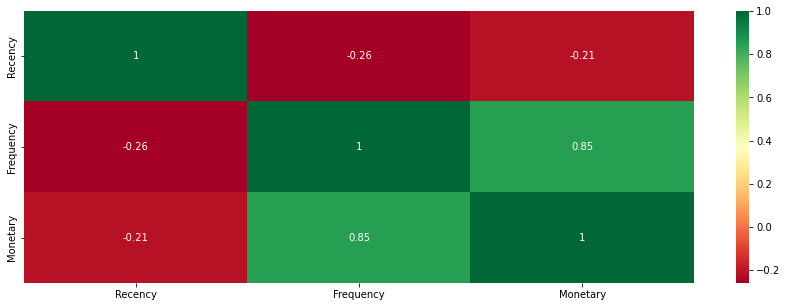

In [ ]:
corrmat=rfm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,5))
#plot heat map
g=sns.heatmap(rfm[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As observable from the heatmap, recency has a low correlation to the other two variables, while frequency and monetary have a high correlation to each other. Therefore, the subsequent analyses will be performed using the frequency and monetary variable.

Before jumping into further analyses, the data will be preprocessed to ensure a good performance in the implemented model.

In [ ]:
# declaring the dataframe after feature selection for further analyses
rfm_fs=rfm[['Frequency','Monetary']]

In [ ]:
rfm_fs.describe()

,Frequency,Monetary
count,4184.000000,4184.000000
mean,4.229924,1224.213653
std,7.242641,2813.096776
min,1.000000,0.000000
25%,1.000000,238.957500
50%,2.000000,542.175000
75%,5.000000,1309.122500
max,179.000000,105835.030000


In [ ]:
# Removal of outliers from Frequency variable in rfm_fs
rfm_fs = rfm_fs[rfm_fs['Frequency']>=tukeys_method(rfm_fs,'Frequency')[0]]
rfm_fs = rfm_fs[rfm_fs['Frequency']<=tukeys_method(rfm_fs,'Frequency')[1]]  
rfm_fs.describe()

,Frequency,Monetary
count,4076.000000,4076.000000
mean,3.436212,970.963666
std,3.158877,1239.125304
min,1.000000,0.000000
25%,1.000000,233.035000
50%,2.000000,520.595000
75%,4.000000,1215.800000
max,17.000000,12011.350000


In [ ]:
# Removal of outliers from Monetary variable in rfm_fs
rfm_fs = rfm_fs[rfm_fs['Monetary']>=tukeys_method(rfm_fs,'Monetary')[0]]
rfm_fs = rfm_fs[rfm_fs['Monetary']<=tukeys_method(rfm_fs,'Monetary')[1]]  
rfm_fs.describe()

,Frequency,Monetary
count,3953.000000,3953.000000
mean,3.194536,816.503706
std,2.801975,839.382180
min,1.000000,0.000000
25%,1.000000,226.040000
50%,2.000000,496.160000
75%,4.000000,1126.950000
max,17.000000,4153.900000


## **Implementation of Unsupervised Learning Model**

Unsupervised machine learning models are the models that learn from unlabelled data. Usually, unsupervised machine learning models are employed to identify the patterns within data sets, and cluster the items according to their patterns. The following part outlines the process of the implementation of unsupervised learning model.

In [ ]:
# libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_fs[['Frequency', 'Monetary']])
scaled = pd.DataFrame(scaled)
scaled.columns=['Frequency','Monetary']
scaled

,Frequency,Monetary
0,0.934864,-0.302675
1,-0.307925,0.016356
2,-0.446013,-0.356253
3,-0.307925,0.185592
4,-0.446013,-0.343340
...,...,...
4179,0.244426,-0.231532
4180,-0.446013,-0.318013
4181,-0.446013,-0.384360
4182,-0.307925,-0.057429


###**K-means Clustering Method**

K-means clustering method is an approach to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.<p>
To determine the optimal $k$, the silhoutte analysis will be performed. Then, the data will be partitioned into $k$ clusters.

In [ ]:
rfm_kmeans=rfm_fs

In [ ]:
# evaluating scores for the elbow method
score=[]
for i in range (2,7):
    kmeans=KMeans (n_clusters=i, max_iter=50, verbose=False).  fit(scaled)
    score.append(kmeans.inertia_)

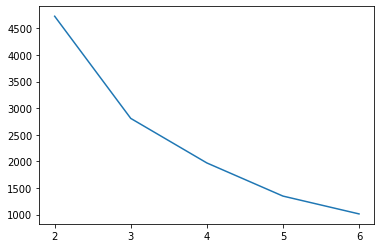

In [ ]:
# plotting the elbow graph
plt.plot(range(2,7,1), score)
plt.xticks(ticks=range(2,7))
plt.show()

Based on the elbow graph, optimal number of cluster, $k=3$.

In [ ]:
# building K-means clustering model
kmeans = KMeans(n_clusters=3, max_iter=50). fit(scaled)
clusters = kmeans.labels_
rfm_kmeans['Cluster']=clusters
rfm_kmeans.groupby('Cluster').size()

Cluster
0    3942
1     234
2       8
dtype: int64

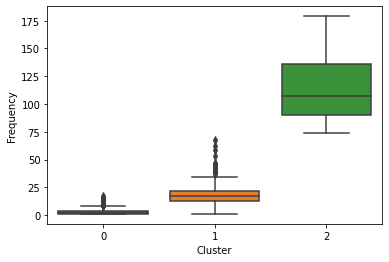

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm_kmeans)

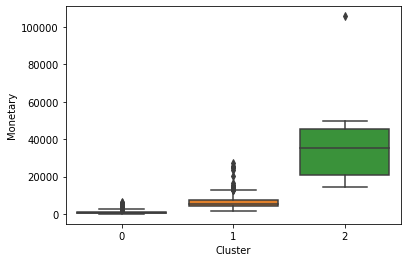

In [ ]:
sns.boxplot(x='Cluster', y='Monetary', data=rfm_kmeans)

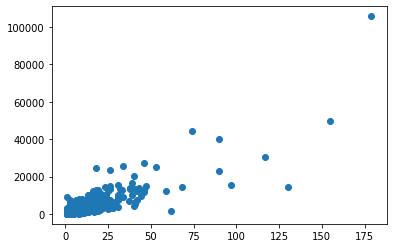

In [ ]:
plt.scatter(rfm_kmeans['Frequency'],rfm_kmeans['Monetary'])

## **Optimization**

Machine learning optimization is the process of tuning the hyperparameters in the effort of searching for the optimal solution for the objective function by using one of the optimization techniques. The following section demonstrates on how the optimization works.

###**Gradient Descent for Line of Best Fit**

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is simply used in machine learning to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible. In this section, Gradient Descent is used to find the optimal line of best fit for the scatter plot of *rfm['Monetary']* against *rfm['Frequency']*.

In [ ]:
# Building the model
m = 0
c = 0

X=rfm_kmeans['Frequency']
Y=rfm_kmeans['Monetary']

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

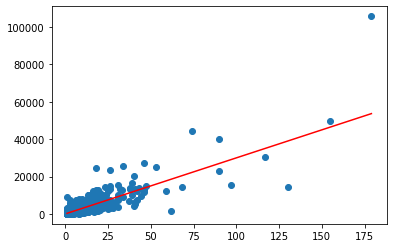

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

# Create figure and subplot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Performing Gradient Descent 
counter=[]
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

    # Making predictions using the objective function, y=mx+c
    Y_pred = m*X + c
    
    # Define and update plot
    ax.set_xlim(0, max(X))
    ax.set_ylim(0, max(Y_pred))    
    ax.cla()
    ax.scatter(X,Y)
    ax.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
    display(fig)    
    clear_output(wait = True)
    plt.pause(0.0000000001)

    # Break the loop if the optimal solution is found
    counter.append(m)
    if i>=10: 
      if counter[i]-counter[i-10]<3:
        break

